# Load data

In [ ]:
import kagglehub

path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset",output_dir=".midterm/data")
print("Path to dataset files:", path)


100%|██████████| 50.1k/50.1k [00:00<00:00, 27.1MB/s]

Extracting files...
Path to dataset files: ./data


In [3]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(path, "WA_Fn-UseC_-HR-Employee-Attrition.csv"))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.info()
print(f"\nThere are {df.isnull().sum().sum()} missing values in the dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Visualization

In [9]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print()
for i in range(0,df.shape[1]-1):
    col = df.columns[i]
    dtype = str(df[col].dtype)
    sample = df[col].head(5).tolist()
    print(f"  {i+1} .{col:<35} <{dtype}> {sample}")

Rows: 1470
Columns: 35

  1 .Age                                 <int64> [41, 49, 37, 33, 27]
  2 .Attrition                           <object> ['Yes', 'No', 'Yes', 'No', 'No']
  3 .BusinessTravel                      <object> ['Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely', 'Travel_Frequently', 'Travel_Rarely']
  4 .DailyRate                           <int64> [1102, 279, 1373, 1392, 591]
  5 .Department                          <object> ['Sales', 'Research & Development', 'Research & Development', 'Research & Development', 'Research & Development']
  6 .DistanceFromHome                    <int64> [1, 8, 2, 3, 2]
  7 .Education                           <int64> [2, 1, 2, 4, 1]
  8 .EducationField                      <object> ['Life Sciences', 'Life Sciences', 'Other', 'Life Sciences', 'Medical']
  9 .EmployeeCount                       <int64> [1, 1, 1, 1, 1]
  10 .EmployeeNumber                      <int64> [1, 2, 4, 5, 7]
  11 .EnvironmentSatisfaction             <int64> [2, 

# Data Catagories

In [11]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numeric variables:", numeric_cols)
print("\nCategorical variables:", categorical_cols)

# Binary/nominal/ordinal
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")

Numeric variables: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical variables: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Attrition: ['Yes' 'No']

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: ['Sales' 'Research & Development' 'Human Resources']

EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: ['Female' 'Male']

JobRole: ['Sales Executive' 'Research Scientist

# Exploratory data analysis

In [13]:
import matplotlib.pyplot as plt

/var/folders/0p/n5gxj8xs0q7bkmhfmcwz30gr0000gn/T/ipykernel_2669/2612687767.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = attrition_counts[1]


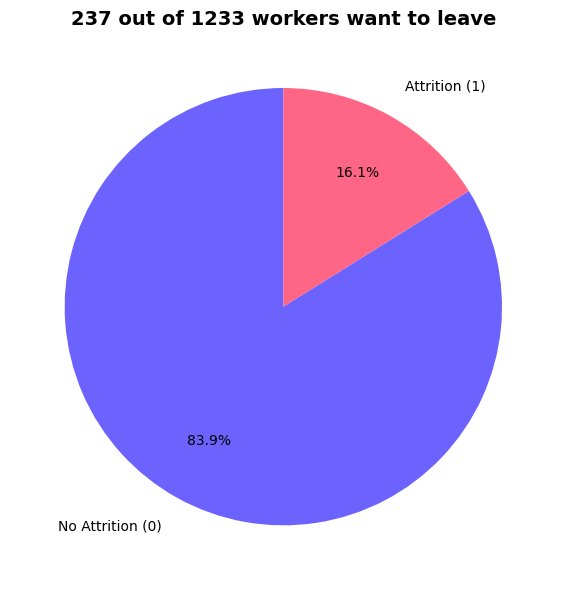

In [19]:
attrition_counts = df['Attrition'].value_counts().sort_index()
labels = ['No Attrition (0)', 'Attrition (1)']
colors = ['#6C63FF', '#FF6584']
fig, ax = plt.subplots(figsize=(7, 6))

wedges, texts, autotexts = ax.pie(
    attrition_counts, 
    labels=labels,
    colors = colors,
    autopct='%1.1f%%', 
    startangle=90,
    pctdistance=0.7,  
    labeldistance=1.15  
)
churned = attrition_counts[1]
total = attrition_counts.sum()
ax.set_title(f'{churned} out of {total - churned} workers want to leave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("Attrition Dist.png")

# Data manipulation

In [26]:
# Mannual categories input
cat_path = r"/Users/liyuqiao/Desktop/LYQ/US_academic/academic/NEU/2026Spring/ECON5140/midterm" 
cat_df = pd.read_excel(os.path.join(cat_path,"Data_categories.xlsx"), sheet_name= 'input')

# one variable per row
rows = []
for _, row in cat_df.iterrows():
    for var in row['Variables'].split(','):
        clean = var.strip().lower().replace('_', ' ').split('(')[0].strip()
        rows.append({
            'variable_type': row['Variable Type'].strip(),
            'subcategory':   row['Subcategory'].strip(),  
            'variable':      clean
        })
var_df = pd.DataFrame(rows)

# change variable name for both var_df - lower cap no space no underline
var_df['variable_col'] = var_df['variable'].str.replace(' ', '')
print(var_df)

            variable_type           subcategory                    variable  \
0       Numeric variables  Personal information                         age   
1       Numeric variables  Personal information          distance from home   
2       Numeric variables  Personal information             employee number   
3       Numeric variables                Income                 hourly rate   
4       Numeric variables                Income                  daily rate   
5       Numeric variables                Income                monthly rate   
6       Numeric variables                Income              monthly income   
7       Numeric variables                Income         percent salary hike   
8       Numeric variables                  Time            years at company   
9       Numeric variables                  Time       years in current role   
10      Numeric variables                  Time  years since last promotion   
11      Numeric variables                  Time     

In [37]:

import pandas as pd
import numpy as np
# choose data to 
rop_cols = ['standardhours', 'employeecount', 'employeenumber', 'attrition']
analysis_df = df.drop(columns=rop_cols, errors='ignore')

numeric_var_list = var_df[var_df['variable_type']== "Numeric variables"]['variable_col'].tolist()
analysis_df.columns = analysis_df.columns.str.lower().str.replace(' ', '')

numeric_var_df =analysis_df[analysis_df.columns[analysis_df.columns.isin(numeric_var_list)]]
print(analysis_df)



      age     businesstravel  dailyrate              department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      distancefromhome  education educationfield  environmentsatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life S

In [ ]:
corr = numeric_var_df.corr()
corr.to_excel(os.path.join(cat_path,"corr.xlsx"))
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_masked = corr.where(~mask)


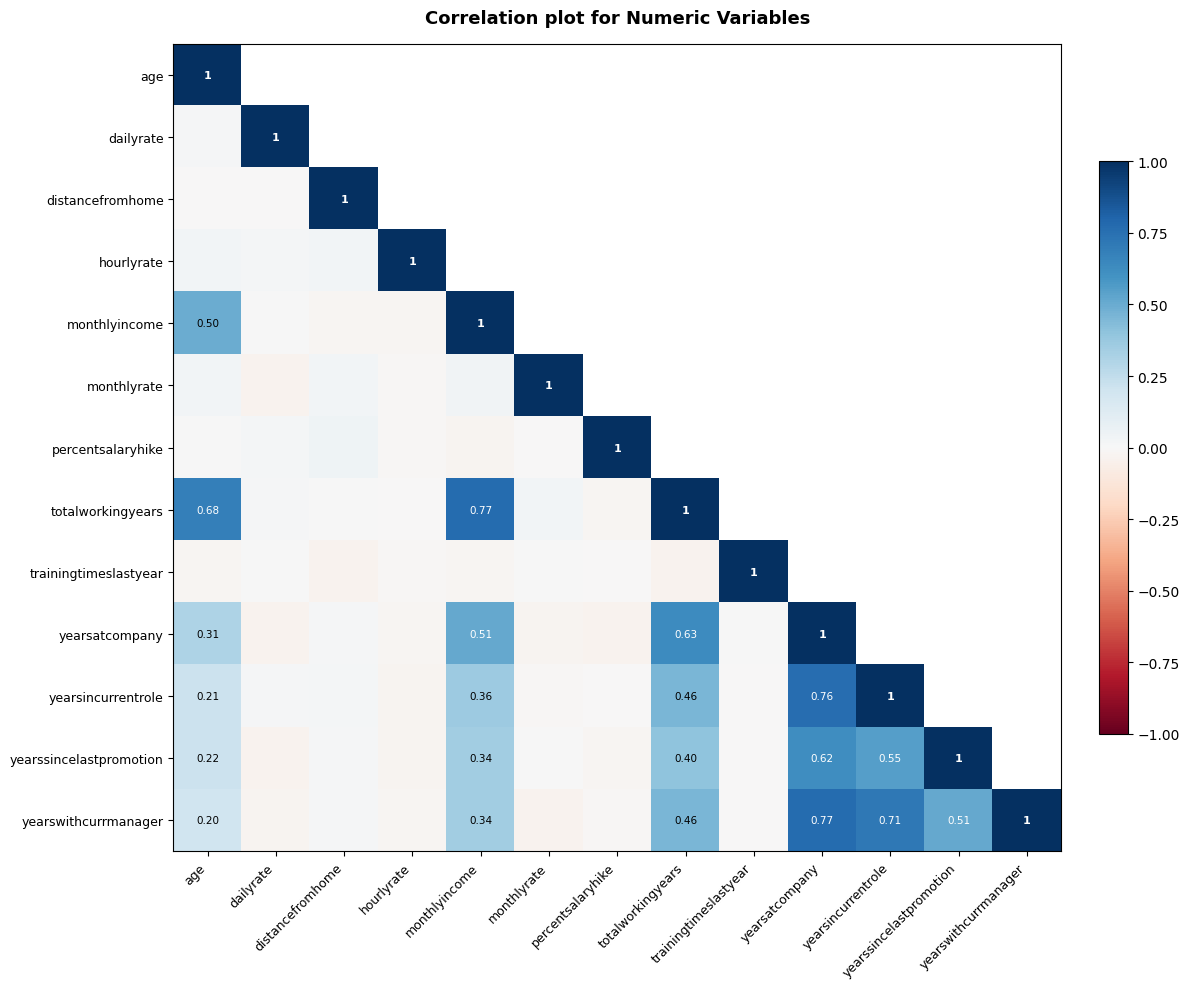

In [40]:

fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_masked, cmap='RdBu', vmin=-1, vmax=1, aspect='auto')

labels = corr.columns.tolist()
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9, color='black')
ax.set_yticklabels(labels, fontsize=9, color='black')


for i in range(len(labels)):
    for j in range(len(labels)):
        if i >= j and not np.isnan(corr_masked.iloc[i, j]):
            val = corr_masked.iloc[i, j]
            if i == j:
                ax.text(j, i, '1', ha='center', va='center', fontsize=8, color='white', fontweight='bold')
            elif abs(val) >= 0.2:
                color = 'white' if abs(val) > 0.5 else 'black'
                ax.text(j, i, f'{val:.2f}', ha='center', va='center', fontsize=7.5, color=color)

plt.colorbar(im, ax=ax, fraction=0.03, pad=0.04)
ax.set_title('Correlation plot for Numeric Variables', fontsize=13, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('correlation_plot.png', bbox_inches='tight', dpi=150)